In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Vegard's Law from melting points of pure elements
#### https://pubs.rsc.org/en/content/articlehtml/2012/cp/c1cp23036k

## Add melting points of pure elements

/var/folders/1f/_0ghpkvx4c14xmf15m39z5fr0000gn/T/ipykernel_26024/1940492489.py:39: UserWarning: Adding colorbar to a different Figure <Figure size 1600x1200 with 3 Axes> than <Figure size 1600x1200 with 1 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(sc1, ticks=np.arange(0, 110, 10))


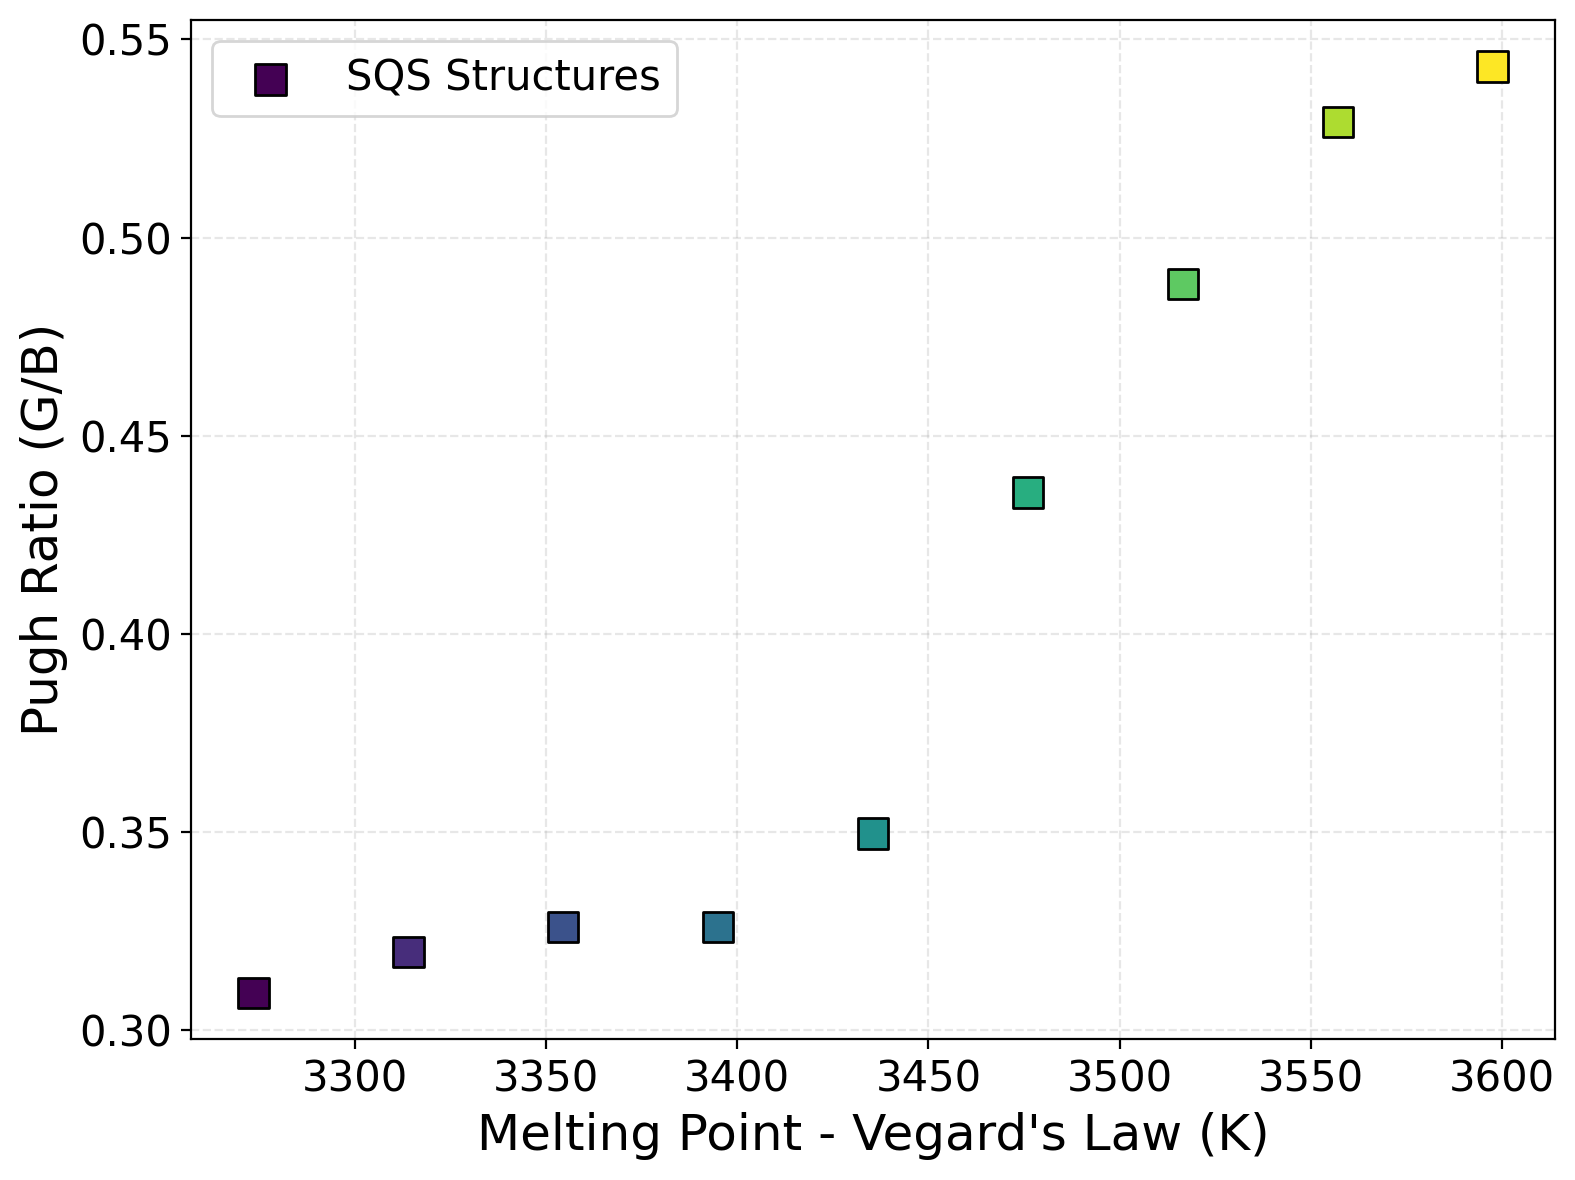

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Melting points for the same tungsten fractions using Vegard's law (Nb=10%)
T_nb = 2720
T_ta = 3290
T_w = 3695

nb_frac = 0.1
dft_tungsten_fractions = np.array([ 10., 20., 30., 40., 50., 60., 70., 80., 90.]) / 100
ta_fracs = 1 - nb_frac - dft_tungsten_fractions
w_fracs = dft_tungsten_fractions
T_alloys = (nb_frac * T_nb) + (ta_fracs * T_ta) + (w_fracs * T_w)

dft_pugh_ratios = np.array([0.29535822, 0.35076316, 0.37598712, 0.3662548,
                                    0.41086948, 0.50134715, 0.50257442, 0.52340443, 0.53076992])


# DFT SQS structures
dft_tungsten_fractions_sqs = np.array([10., 20., 30., 40., 50., 60., 70., 80., 90.])
dft_pugh_ratios_sqs = np.array([0.30941686, 0.31974194, 0.32610441, 0.32615475,
                                0.34965427, 0.43568469, 0.48830741, 0.52908806, 0.54319631])

# Calculate melting points for SQS structures
ta_fracs_sqs = 1 - nb_frac - dft_tungsten_fractions_sqs / 100
w_fracs_sqs = dft_tungsten_fractions_sqs / 100
T_alloys_sqs = (nb_frac * T_nb) + (ta_fracs_sqs * T_ta) + (w_fracs_sqs * T_w)

plt.figure(figsize=(8, 6), dpi=200)
pugh_ratios = np.array(dft_pugh_ratios)
tungsten_percentages = (w_fracs * 100).round().astype(int)
tungsten_percentages_sqs = dft_tungsten_fractions_sqs

# Ordered structures (circles)
# sc1 = plt.scatter(T_alloys, pugh_ratios, s=120, c=tungsten_percentages, cmap='viridis', edgecolors="black", zorder=3, marker='o', label='Ordered Structures')
# SQS structures (squares)
sc2 = plt.scatter(T_alloys_sqs, dft_pugh_ratios_sqs, s=120, c=tungsten_percentages_sqs, cmap='viridis', edgecolors="black", zorder=3, marker='s', label='SQS Structures')

cbar = plt.colorbar(sc1, ticks=np.arange(0, 110, 10))
cbar.set_label('Tungsten (%)', fontsize=18)
cbar.ax.tick_params(labelsize=15)

plt.xlabel("Melting Point - Vegard's Law (K)", fontsize=18)
plt.ylabel("Pugh Ratio (G/B)", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.legend(fontsize=15)
plt.show()

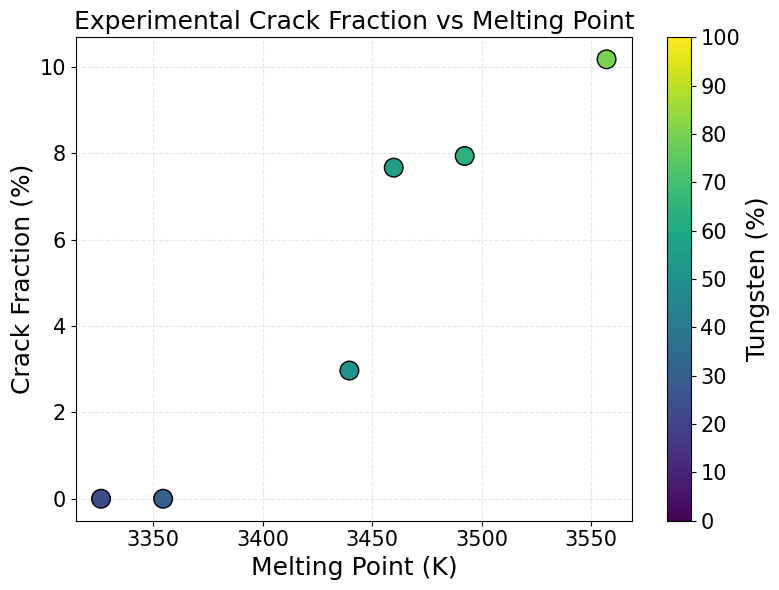

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Experimental data
experimental_alloys = [
    {"W":23, "Nb":10},
    {"W":30, "Nb":10},
    {"W":51, "Nb":10},
    {"W":56, "Nb":10},
    {"W":64, "Nb":10},
    {"W":80, "Nb":10}
]
for diction in experimental_alloys:
    diction["Ta"] = 100 - diction["W"] - diction["Nb"]

experimental_crack_fractions = [0.  ,  0.  ,  2.97,  7.67,  7.94, 10.18]

# Melting points of pure elements
T_w = 3695
T_ta = 3290
T_nb = 2720

# Compute melting points using Vegard's law (weighted average)
T_alloys = []
w_percentages = []

for alloy in experimental_alloys:
    w_frac = alloy["W"]/100
    ta_frac = alloy["Ta"]/100
    nb_frac = alloy["Nb"]/100
    T_alloy = w_frac*T_w + ta_frac*T_ta + nb_frac*T_nb
    T_alloys.append(T_alloy)
    w_percentages.append(alloy["W"])

plt.figure(figsize=(8,6))
norm = Normalize(vmin=0, vmax=100)
sc = plt.scatter(
    T_alloys, experimental_crack_fractions, s=180,
    c=w_percentages, cmap='viridis', norm=norm,
    edgecolors="black", zorder=3
)
cbar = plt.colorbar(sc, ticks=np.arange(0, 110, 10))
cbar.set_label('Tungsten (%)', fontsize=18)
cbar.ax.tick_params(labelsize=15)

plt.xlabel("Melting Point (K)", fontsize=18)
plt.ylabel("Crack Fraction (%)", fontsize=18)
plt.title("Experimental Crack Fraction vs Melting Point", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

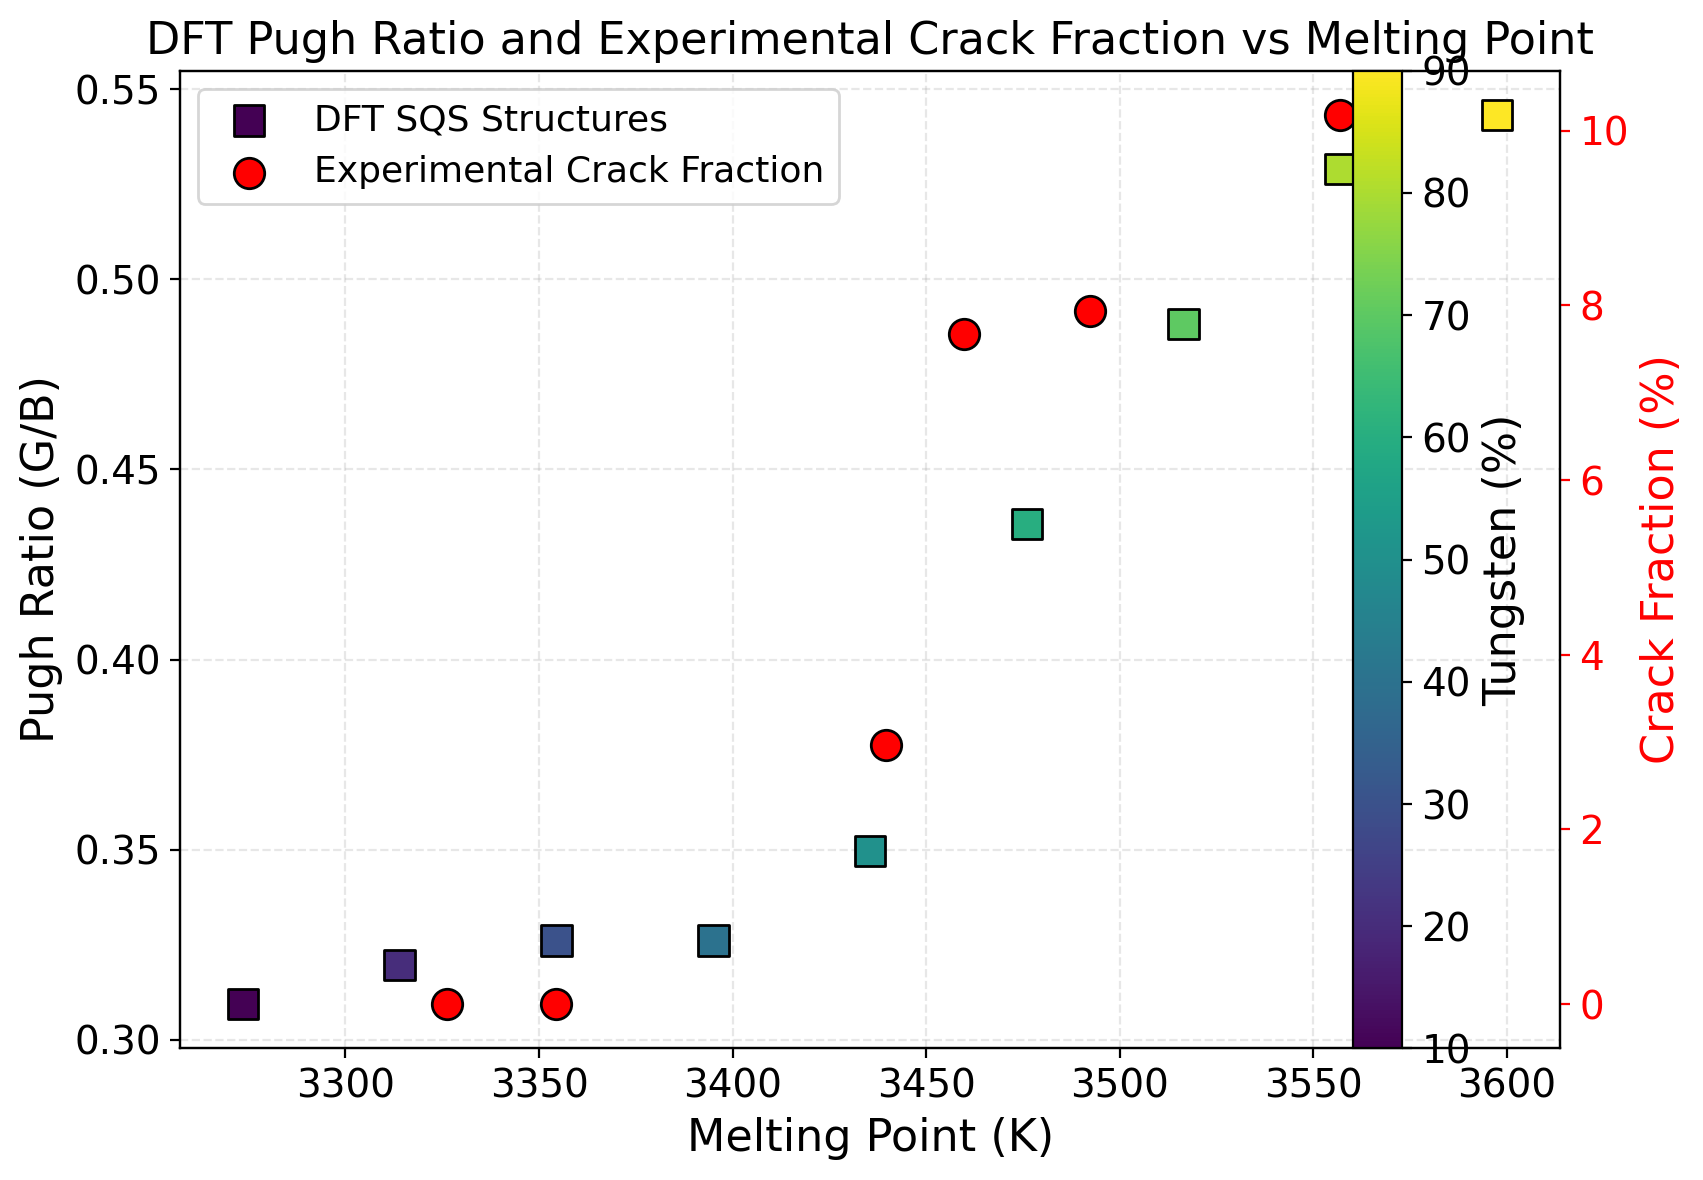

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# -----------------------------
# Experimental data
# -----------------------------
experimental_alloys = [
    {"W":23, "Nb":10},
    {"W":30, "Nb":10},
    {"W":51, "Nb":10},
    {"W":56, "Nb":10},
    {"W":64, "Nb":10},
    {"W":80, "Nb":10}
]
for diction in experimental_alloys:
    diction["Ta"] = 100 - diction["W"] - diction["Nb"]

experimental_crack_fractions = [0.0, 0.0, 2.97, 7.67, 7.94, 10.18]

# -----------------------------
# Melting points (Vegard’s law)
# -----------------------------
T_w, T_ta, T_nb = 3695, 3290, 2720

T_alloys_exp, w_percentages_exp = [], []
for alloy in experimental_alloys:
    w_frac = alloy["W"]/100
    ta_frac = alloy["Ta"]/100
    nb_frac = alloy["Nb"]/100
    T_alloy = w_frac*T_w + ta_frac*T_ta + nb_frac*T_nb
    T_alloys_exp.append(T_alloy)
    w_percentages_exp.append(alloy["W"])

# -----------------------------
# DFT data (SQS)
# -----------------------------
nb_frac = 0.1
dft_tungsten_fractions_sqs = np.array([10., 20., 30., 40., 50., 60., 70., 80., 90.])
ta_fracs_sqs = 1 - nb_frac - dft_tungsten_fractions_sqs / 100
w_fracs_sqs = dft_tungsten_fractions_sqs / 100
T_alloys_sqs = (nb_frac * T_nb) + (ta_fracs_sqs * T_ta) + (w_fracs_sqs * T_w)

dft_pugh_ratios_sqs = np.array([
    0.30941686, 0.31974194, 0.32610441, 0.32615475,
    0.34965427, 0.43568469, 0.48830741, 0.52908806, 0.54319631
])

# -----------------------------
# Plot combined data
# -----------------------------
plt.figure(figsize=(8, 6), dpi=200)

# DFT SQS structures
sc2 = plt.scatter(
    T_alloys_sqs, dft_pugh_ratios_sqs, s=120,
    c=dft_tungsten_fractions_sqs, cmap='viridis',
    edgecolors="black", zorder=3, marker='s',
    label='DFT SQS Structures'
)

# Experimental data (right y-axis)
ax = plt.gca()
ax2 = ax.twinx()
ax2.scatter(
    T_alloys_exp, experimental_crack_fractions,
    color='red', s=120, edgecolors='black', marker='o',
    label='Experimental Crack Fraction', zorder=4
)

# Colorbar
cbar = plt.colorbar(sc2, ticks=np.arange(0, 110, 10))
cbar.set_label('Tungsten (%)', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Axis labels
ax.set_xlabel("Melting Point (K)", fontsize=16)
ax.set_ylabel("Pugh Ratio (G/B)", fontsize=16, color='black')
ax2.set_ylabel("Crack Fraction (%)", fontsize=16, color='red')

# Tick label formatting
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14, colors='black')
ax2.tick_params(axis='y', labelsize=14, colors='red')

# Grid and legend
ax.grid(alpha=0.3, linestyle="--")

# Combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=13, loc="upper left")

plt.title("DFT Pugh Ratio and Experimental Crack Fraction vs Melting Point", fontsize=16)
plt.tight_layout()
plt.show()


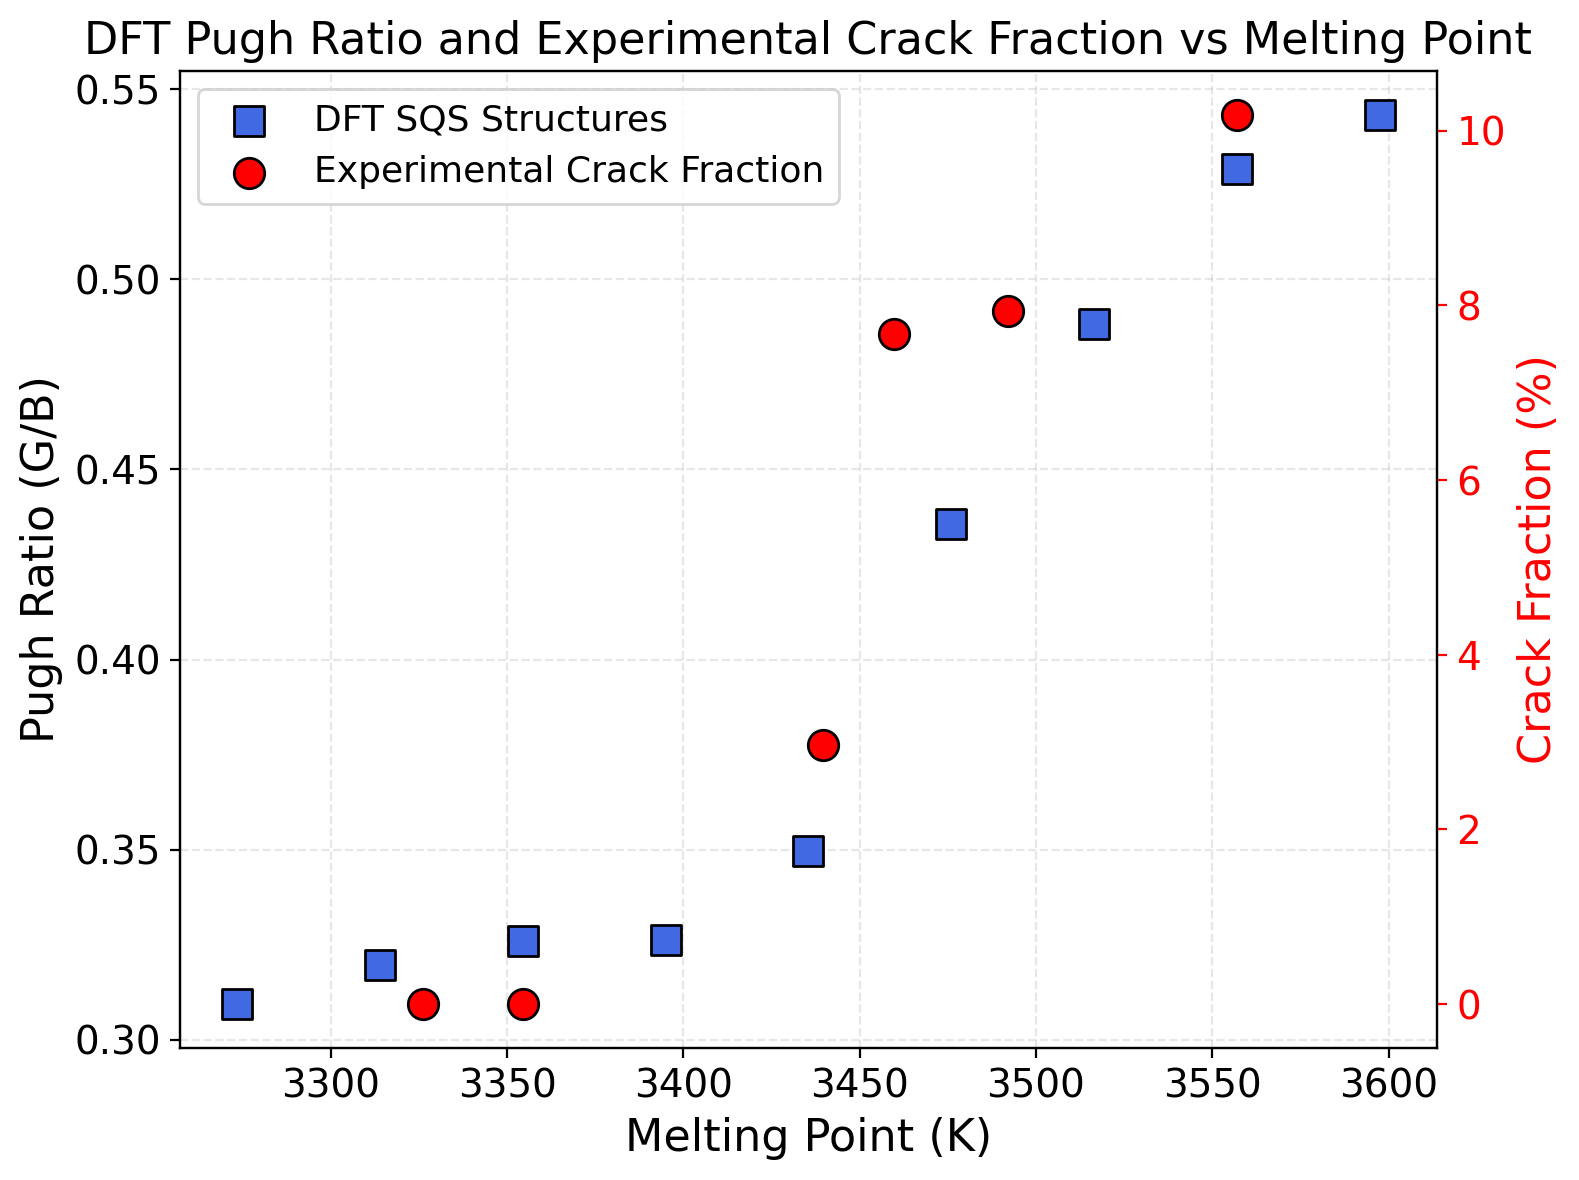

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# -----------------------------
# Experimental data
# -----------------------------
experimental_alloys = [
    {"W":23, "Nb":10},
    {"W":30, "Nb":10},
    {"W":51, "Nb":10},
    {"W":56, "Nb":10},
    {"W":64, "Nb":10},
    {"W":80, "Nb":10}
]
for diction in experimental_alloys:
    diction["Ta"] = 100 - diction["W"] - diction["Nb"]

experimental_crack_fractions = [0.0, 0.0, 2.97, 7.67, 7.94, 10.18]

# -----------------------------
# Melting points (Vegard’s law)
# -----------------------------
T_w, T_ta, T_nb = 3695, 3290, 2720

T_alloys_exp, w_percentages_exp = [], []
for alloy in experimental_alloys:
    w_frac = alloy["W"]/100
    ta_frac = alloy["Ta"]/100
    nb_frac = alloy["Nb"]/100
    T_alloy = w_frac*T_w + ta_frac*T_ta + nb_frac*T_nb
    T_alloys_exp.append(T_alloy)
    w_percentages_exp.append(alloy["W"])

# -----------------------------
# DFT data (SQS)
# -----------------------------
nb_frac = 0.1
dft_tungsten_fractions_sqs = np.array([10., 20., 30., 40., 50., 60., 70., 80., 90.])
ta_fracs_sqs = 1 - nb_frac - dft_tungsten_fractions_sqs / 100
w_fracs_sqs = dft_tungsten_fractions_sqs / 100
T_alloys_sqs = (nb_frac * T_nb) + (ta_fracs_sqs * T_ta) + (w_fracs_sqs * T_w)

dft_pugh_ratios_sqs = np.array([
    0.30941686, 0.31974194, 0.32610441, 0.32615475,
    0.34965427, 0.43568469, 0.48830741, 0.52908806, 0.54319631
])

# -----------------------------
# Plot combined data (no colorbar)
# -----------------------------
plt.figure(figsize=(8, 6), dpi=200)

# DFT SQS structures
plt.scatter(
    T_alloys_sqs, dft_pugh_ratios_sqs, s=120,
    color='royalblue', edgecolors="black", zorder=3, marker='s',
    label='DFT SQS Structures'
)

# Experimental data (right y-axis)
ax = plt.gca()
ax2 = ax.twinx()
ax2.scatter(
    T_alloys_exp, experimental_crack_fractions,
    color='red', s=120, edgecolors='black', marker='o',
    label='Experimental Crack Fraction', zorder=4
)

# Axis labels
ax.set_xlabel("Melting Point (K)", fontsize=16)
ax.set_ylabel("Pugh Ratio (G/B)", fontsize=16, color='black')
ax2.set_ylabel("Crack Fraction (%)", fontsize=16, color='red')

# Tick label formatting
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14, colors='black')
ax2.tick_params(axis='y', labelsize=14, colors='red')

# Grid and legend
ax.grid(alpha=0.3, linestyle="--")

# Combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=13, loc="upper left")

plt.title("DFT Pugh Ratio and Experimental Crack Fraction vs Melting Point", fontsize=16)
plt.tight_layout()
plt.show()


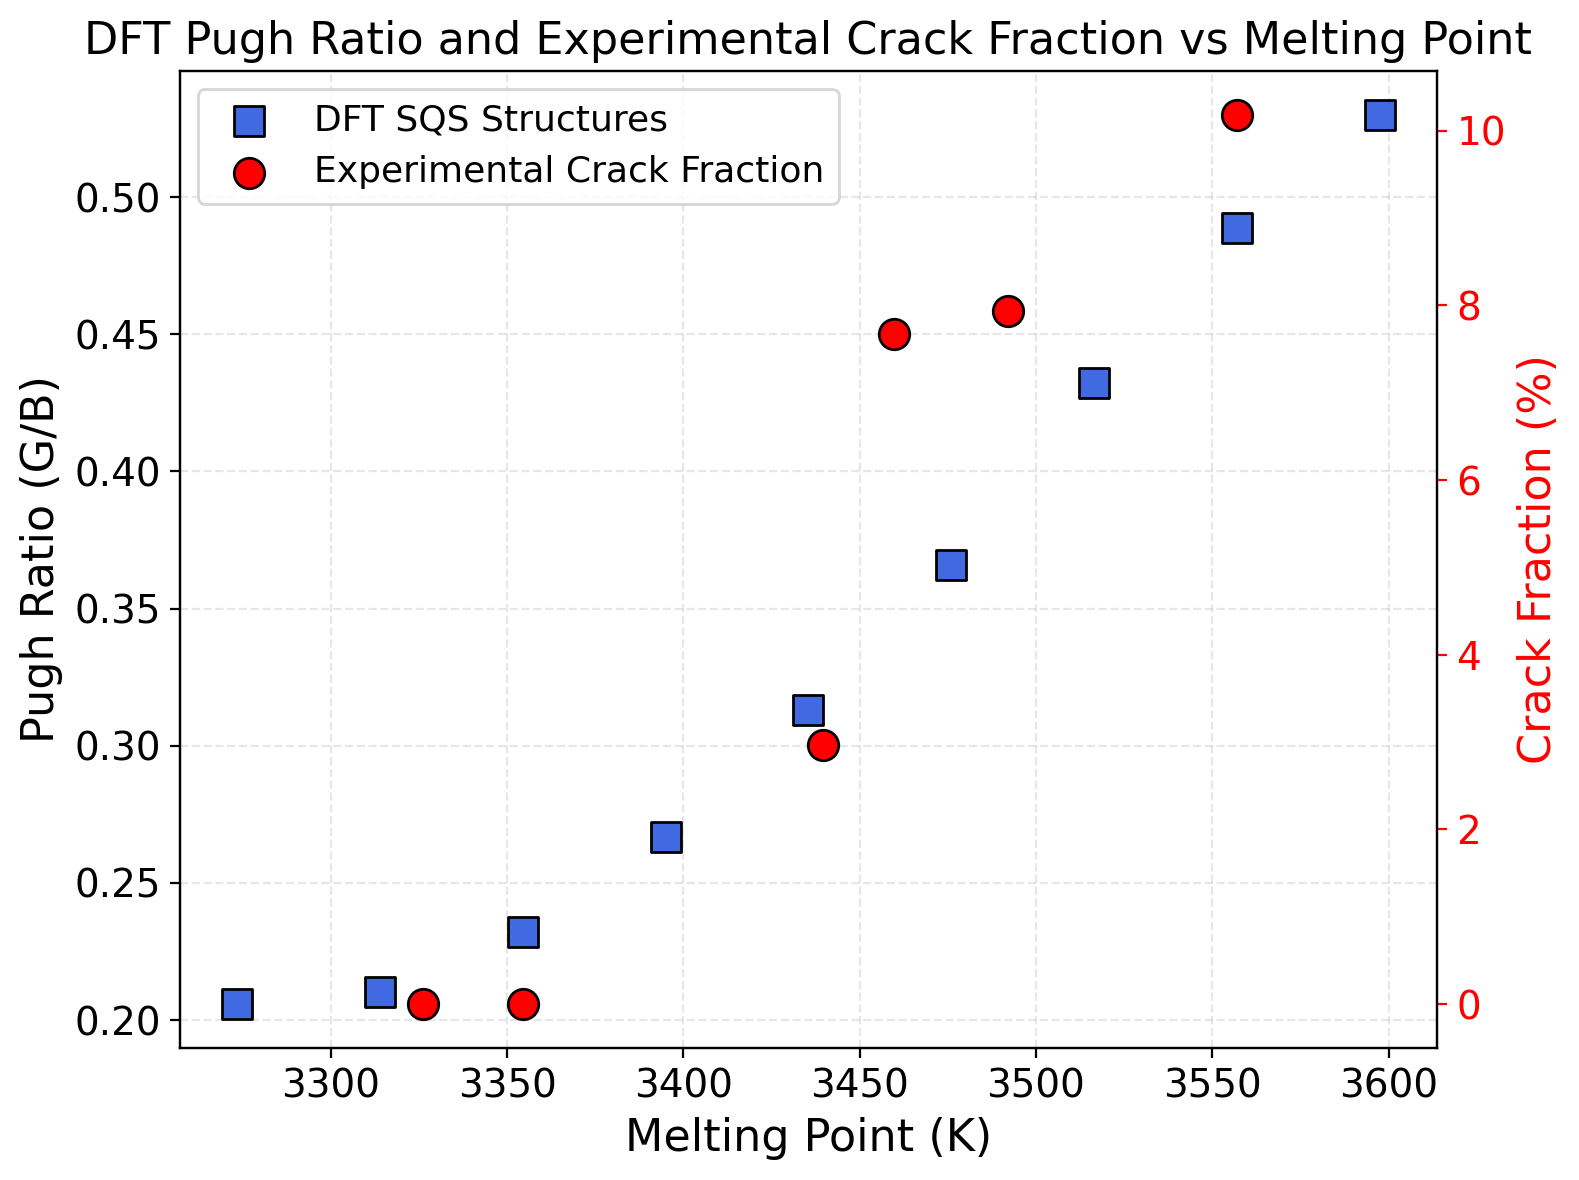

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# -----------------------------
# Experimental data
# -----------------------------
experimental_alloys = [
    {"W":23, "Nb":10},
    {"W":30, "Nb":10},
    {"W":51, "Nb":10},
    {"W":56, "Nb":10},
    {"W":64, "Nb":10},
    {"W":80, "Nb":10}
]
for diction in experimental_alloys:
    diction["Ta"] = 100 - diction["W"] - diction["Nb"]

experimental_crack_fractions = [0.0, 0.0, 2.97, 7.67, 7.94, 10.18]

# -----------------------------
# Melting points (Vegard’s law)
# -----------------------------
T_w, T_ta, T_nb = 3695, 3290, 2720

T_alloys_exp, w_percentages_exp = [], []
for alloy in experimental_alloys:
    w_frac = alloy["W"]/100
    ta_frac = alloy["Ta"]/100
    nb_frac = alloy["Nb"]/100
    T_alloy = w_frac*T_w + ta_frac*T_ta + nb_frac*T_nb
    T_alloys_exp.append(T_alloy)
    w_percentages_exp.append(alloy["W"])

# -----------------------------
# DFT data (SQS)
# -----------------------------
nb_frac = 0.1
dft_tungsten_fractions_sqs = np.array([10., 20., 30., 40., 50., 60., 70., 80., 90.])
ta_fracs_sqs = 1 - nb_frac - dft_tungsten_fractions_sqs / 100
w_fracs_sqs = dft_tungsten_fractions_sqs / 100
T_alloys_sqs = (nb_frac * T_nb) + (ta_fracs_sqs * T_ta) + (w_fracs_sqs * T_w)

dft_pugh_ratios_sqs = np.array([0.2058504 , 0.21031262, 0.23192226, 0.26673674, 0.31295778,
       0.365935  , 0.43210635, 0.48884149, 0.52993651])

# -----------------------------
# Plot combined data (no colorbar)
# -----------------------------
plt.figure(figsize=(8, 6), dpi=200)

# DFT SQS structures
plt.scatter(
    T_alloys_sqs, dft_pugh_ratios_sqs, s=120,
    color='royalblue', edgecolors="black", zorder=3, marker='s',
    label='DFT SQS Structures'
)

# Experimental data (right y-axis)
ax = plt.gca()
ax2 = ax.twinx()
ax2.scatter(
    T_alloys_exp, experimental_crack_fractions,
    color='red', s=120, edgecolors='black', marker='o',
    label='Experimental Crack Fraction', zorder=4
)

# Axis labels
ax.set_xlabel("Melting Point (K)", fontsize=16)
ax.set_ylabel("Pugh Ratio (G/B)", fontsize=16, color='black')
ax2.set_ylabel("Crack Fraction (%)", fontsize=16, color='red')

# Tick label formatting
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14, colors='black')
ax2.tick_params(axis='y', labelsize=14, colors='red')

# Grid and legend
ax.grid(alpha=0.3, linestyle="--")

# Combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=13, loc="upper left")

plt.title("DFT Pugh Ratio and Experimental Crack Fraction vs Melting Point", fontsize=16)
plt.tight_layout()
plt.show()
